# SPGR

In [1]:
from multiprocessing import set_start_method
set_start_method('forkserver')

In [2]:
import version_control

Last run on cashlab03-deb at 2015-04-28 11:19:08.497967

Phypno Version: 5fd34bdecf40bf72accfd82aba7495eba94acafb

Babel==1.3, Cython==0.22, Jinja2==2.7.3, Markdown==2.6.2, MarkupSafe==0.23, Pillow==2.8.1, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3.1, alabaster==0.7.3, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==14.05.14, coverage==3.7.1, decorator==3.4.2, docutils==0.12, easydev==0.8.3, ipython==3.1.0, jedi==0.8.1-final0, jsonschema==2.4.0, matplotlib==1.4.3, memory-profiler==0.32, mistune==0.5.1, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.2, nose==1.3.6, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.16.0, pandocfilters==1.2.4, pep8==1.6.2, pexpect==3.3, pockets==0.2.4, psutil==2.2.1, pycurl==7.19.5.1, pyflakes==0.8.1, pyparsing==2.0.3, pyqtgraph==0.9.10, python-dateutil==2.4.2, python-igraph==0.7.1-4, pytz==2015.2, pyzmq==14.6.0, requests==2.6.2, rope-py3k==0.9.4-1, rpy2==2.5.6, scikit-learn==0.16.1, scipy==0.15.1, six==1.9.0, snowbal

In [3]:
from spgr import lg
from logging import INFO, DEBUG
lg.setLevel(INFO)

## Electrode Locations

### Locations for all the subjects

In [4]:
from phypno.attr import Freesurfer, Channels

from spgr.constants import (IMAGES_PATH,
                            REC_PATH,
                            FS_FOLDER,
                            HEMI_SUBJ, 
                            CHAN_TYPE, 
                            DATA_OPTIONS,
                            )
from spgr.read_data import get_chan_used_in_analysis

In [5]:
images_dir = IMAGES_PATH.joinpath('electrode_locations')
if not images_dir.exists():
    images_dir.mkdir()

PLOT_COLOR = 'kw'

In [6]:
from phypno.viz import Viz3
from IPython.display import display
SKIN_COLOR = (239, 208, 207, 240)

INFO:spgr.read_data:EM09 analysis chan 69, with location 69


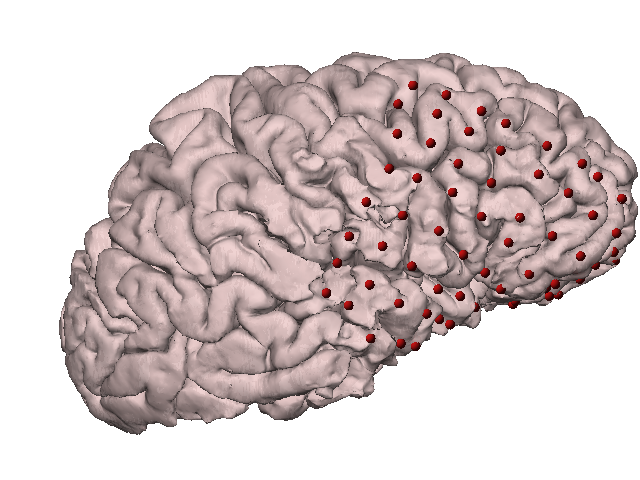

INFO:spgr.read_data:MG67 analysis chan 57, with location 57


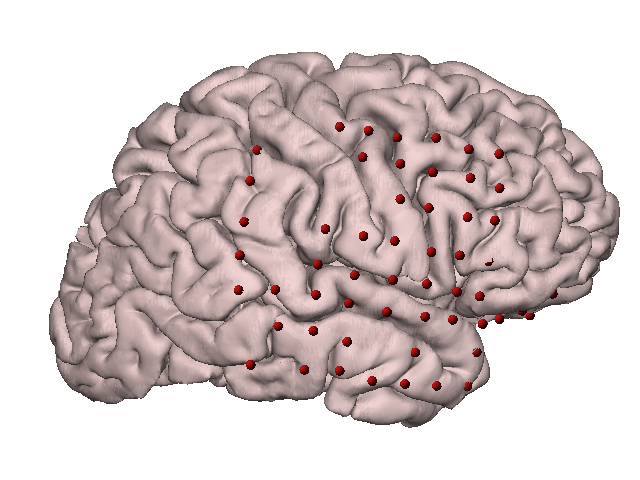

INFO:spgr.read_data:MG37 analysis chan 78, with location 78


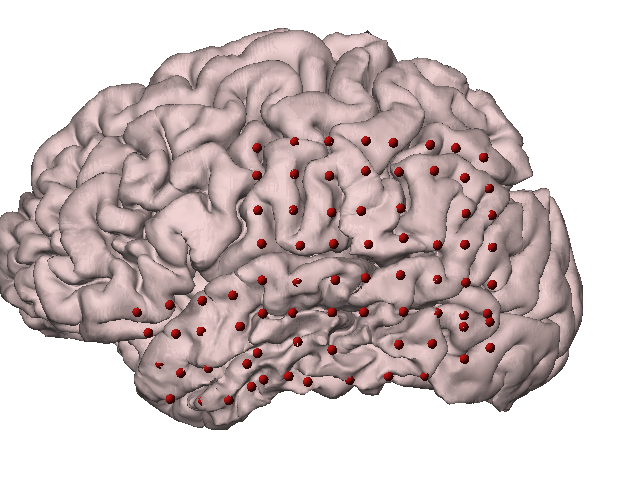

INFO:spgr.read_data:MG61 analysis chan 93, with location 93


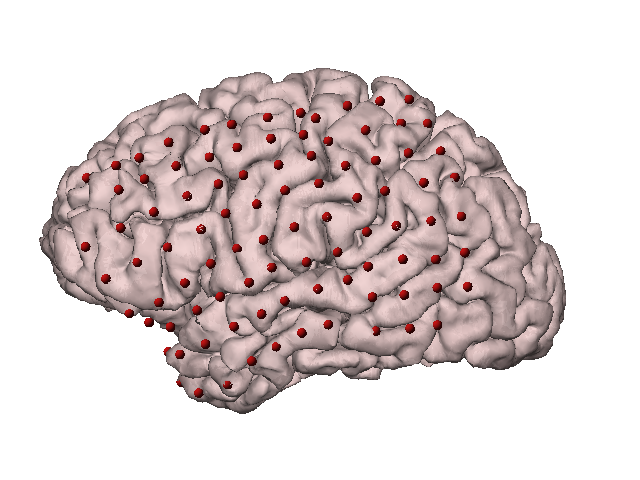

INFO:spgr.read_data:MG64 analysis chan 83, with location 83


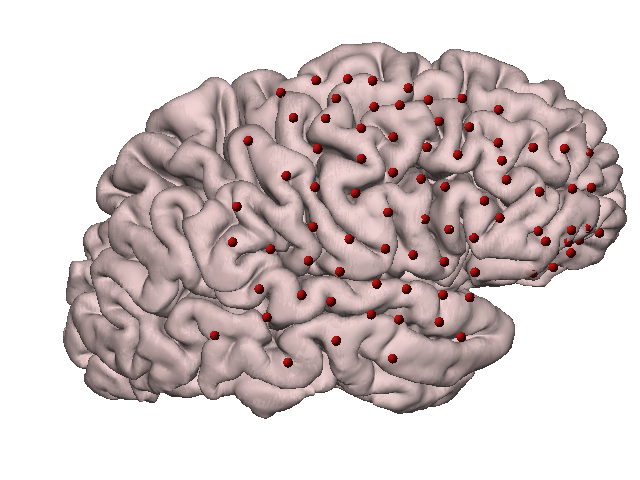

INFO:spgr.read_data:MG17 analysis chan 93, with location 93


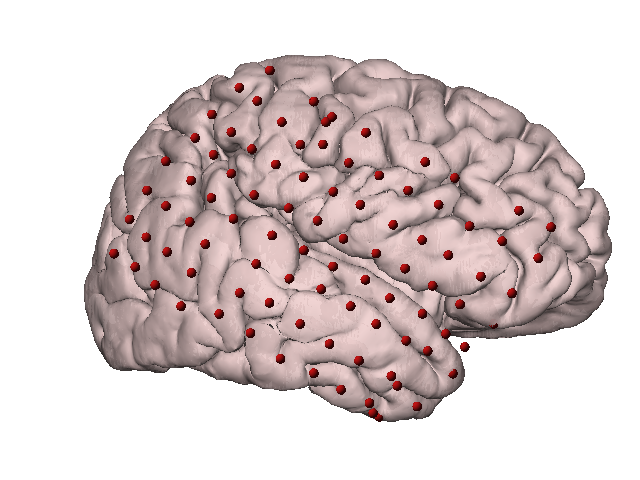

INFO:spgr.read_data:MG63 analysis chan 93, with location 93


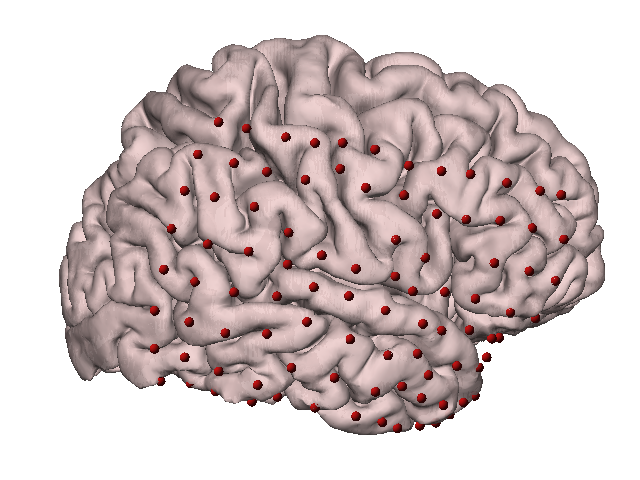

INFO:spgr.read_data:MG33 analysis chan 64, with location 64


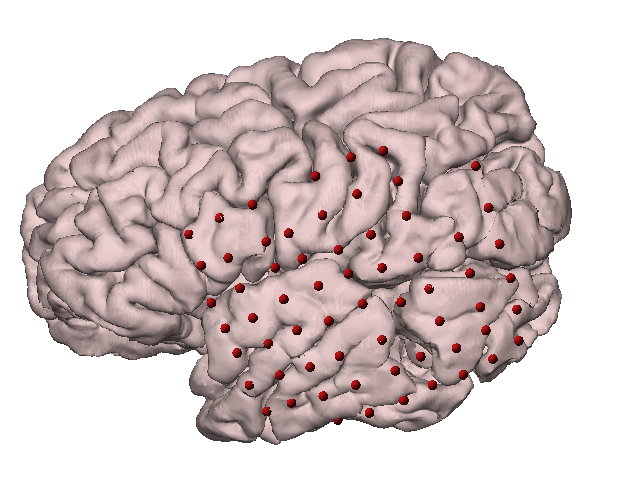

In [7]:
for subj, hemi in HEMI_SUBJ.items():
    chan = get_chan_used_in_analysis(subj, 'sleep', CHAN_TYPE, **DATA_OPTIONS)
    fs = Freesurfer(str(REC_PATH.joinpath(subj).joinpath(FS_FOLDER)))
    surf = getattr(fs.read_brain(), hemi)
    
    v = Viz3(color='kw')
    v.add_chan(chan, color=(200, 20, 20, 255))
    v.add_surf(surf, color=SKIN_COLOR)
    v.save(str(images_dir.joinpath(subj + '.png')))
    display(v)

## Coverage

In [8]:
from numpy import ones
from spgr.constants import HEMI_SUBJ, CHAN_TYPE, DATA_OPTIONS
from spgr.read_data import get_chan_used_in_analysis
from spgr.spindle_source import get_morph_linear, lg
from spgr.plot_spindles import plot_surf

INFO:spgr:Could not import LSF, running local jobs only


INFO:spgr.read_data:EM09 analysis chan 69, with location 69
INFO:spgr.spindle_source:Projecting values for EM09
INFO:spgr.read_data:EM09 analysis chan 69, with location 69
INFO:spgr.read_data:MG67 analysis chan 57, with location 57
INFO:spgr.spindle_source:Projecting values for MG67
INFO:spgr.read_data:MG67 analysis chan 57, with location 57
INFO:spgr.read_data:MG37 analysis chan 78, with location 78
INFO:spgr.spindle_source:Projecting values for MG37
INFO:spgr.read_data:MG37 analysis chan 78, with location 78
INFO:spgr.read_data:MG61 analysis chan 93, with location 93
INFO:spgr.spindle_source:Projecting values for MG61
INFO:spgr.read_data:MG61 analysis chan 93, with location 93
INFO:spgr.read_data:MG64 analysis chan 83, with location 83
INFO:spgr.spindle_source:Projecting values for MG64
INFO:spgr.read_data:MG64 analysis chan 83, with location 83
INFO:spgr.read_data:MG17 analysis chan 93, with location 93
INFO:spgr.spindle_source:Projecting values for MG17
INFO:spgr.read_data:MG17 ana

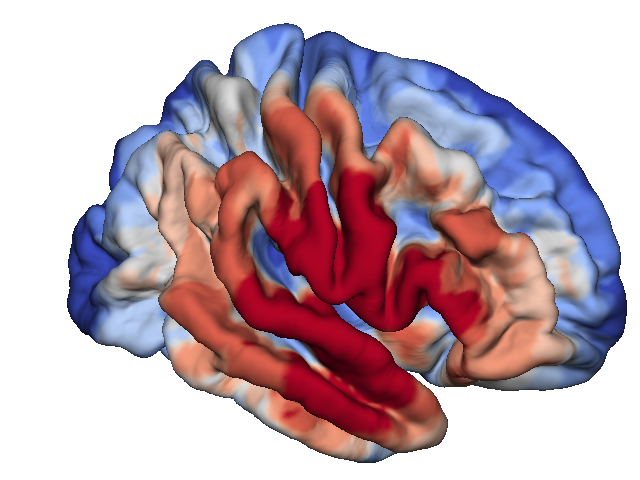

In [10]:
morphed = []

for subj in HEMI_SUBJ:

    # set channel values to 1
    chan = get_chan_used_in_analysis(subj, 'sleep', CHAN_TYPE, **DATA_OPTIONS)
    values = ones(chan.n_chan)
    
    morphed.append(get_morph_linear(subj, values, reref='avg'))
    
v = plot_surf(morphed, limits=(0, 1), extra_smoothing=False)
v.save(str(images_dir.joinpath('coverage_average.png')))
v